<a href="https://colab.research.google.com/github/VnMxMadMax/Data-Analysis-Project/blob/main/E_commerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insightful E-commerce Sales Analysis**

**Intrduction**

In this project, we analyze an e-commerce salesdataset to uncover trends and insights.
We aim to answer key business questions such as:


*   What are the top-selling products?
*   How do sales trends very over time?
*   What are the most profitable customer segments?




# Importing the Libraries

In [1]:
# Importing libraries for data analysis and visualization

import numpy as np                # For Numerical Operation and array Handling
import pandas as pd               # For Data manipulation and analysis
import matplotlib.pyplot as plt   # For Static plotting
import seaborn as sns             # For Statistical graphics
import plotly.express as px       # For Interactive plotting and visualizations

# Load the Dataset

In [2]:
# Reading the dataset from the specifiend file path into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Data for projects/ecommerce_sales_analysis.csv')

# Data Understanding and Cleaning

Before performing analysis, we cleaned the dataset to ensure data integrity. The following steps were taken:

* Handled missing values appropriately.

* Converted data types for consistency.

* Removed duplicates and irrelevant columns.

* Standardized categorical data for better analysis.

In [3]:
df.head() # Displays the first 5 rows of the DataFrame

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [4]:
# basic summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [5]:
# Summary statistics
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [6]:
# Check for missing values
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
price,0
review_score,0
review_count,0
sales_month_1,0
sales_month_2,0
sales_month_3,0
sales_month_4,0


In [7]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())

0


In [8]:
df.shape

(1000, 18)

In [9]:
# No. of unique elements
df.nunique()

,0
product_id,1000
product_name,1000
category,7
price,992
review_score,41
review_count,620
sales_month_1,634
sales_month_2,629
sales_month_3,630
sales_month_4,640


In [10]:
df["category"].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [11]:
# Calculate total Sales for each product
df['total_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].sum(axis=1)

In [12]:
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393,5515
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474,4511
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654,5527
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394,4546


<Axes: >

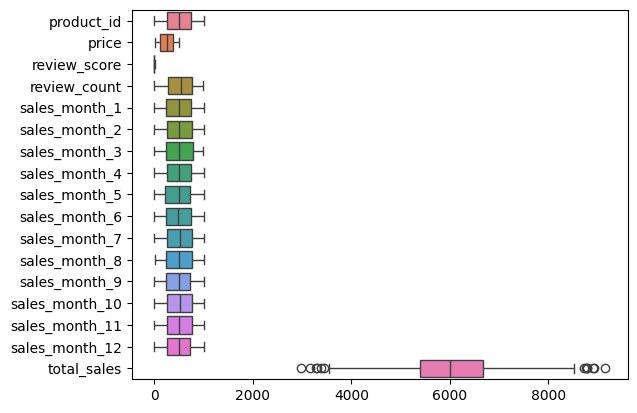

In [13]:
# check outliers
sns.boxplot(df,orient='h')

# **Exploratory Data Analysis**

We performed in-depth data exploration to extract meaningful insights.


**Distribution of Numerical Features**

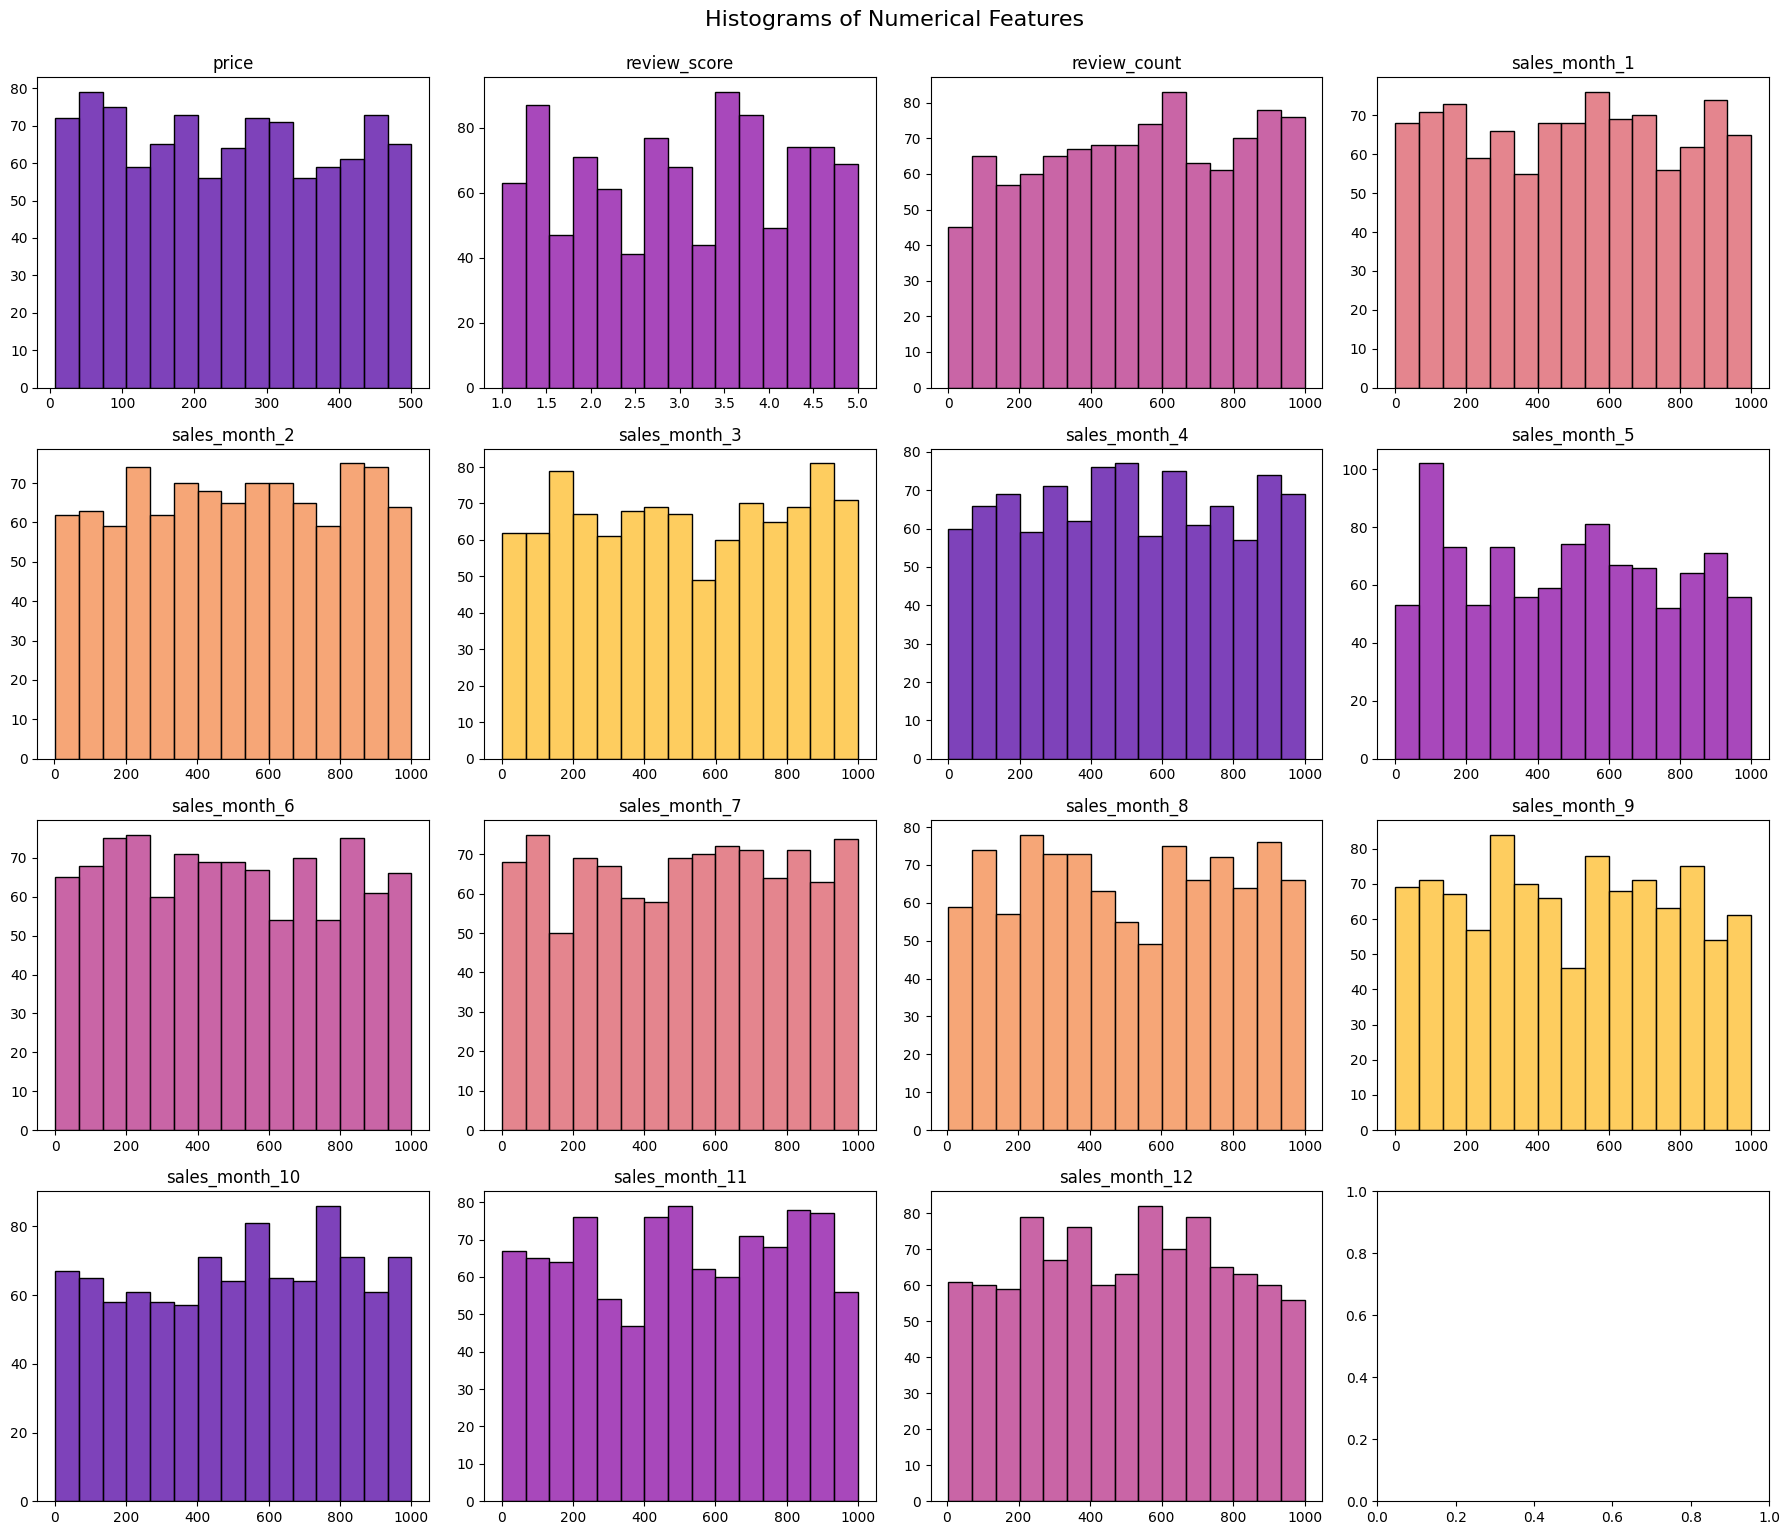

In [14]:
# List of Numerical featres
numerical_features = ['price', 'review_score', 'review_count'] + [f'sales_month_{i}' for i in range(1, 13)]

# Credating subplots for histograms
fig, axes = plt.subplots(4, 4, figsize=(18,15)) # 4X4 gird to accomadate all numerical features
axes = axes.flatten() # Flatten to make indexing easier

# Plotting histogram for each numerical features
for i, feature in enumerate(numerical_features):
  sns.histplot(df[feature], bins=15, kde=False, ax = axes[i], color = sns.color_palette("plasma")[i % len(sns.color_palette("plasma"))])
  axes[i].set_title(feature, fontsize=12)
  axes[i].set_xlabel('') # Remove x-labels for cleaner visualization
  axes[i].set_ylabel('') # Remove y-labels for cleaner visualization

# Adjust layout for better readability
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
plt.show()


# Data Visualization

**Top Performing Product Categories**

In [15]:
# Calculate total sales for each product category
df['total_sales'] = df.loc[:,'sales_month_1':'sales_month_12'].sum(axis=1)

#Aggregate total sales by product category
category_sales = df.groupby('category')['total_sales'].sum().reset_index()

# Sort categories by total sales in descending order
category_sales = category_sales.sort_values(by='total_sales',ascending=False)

# Create a bar plot for top-performing product categories with an upgraded color palete
fig = px.bar(category_sales, x='category', y='total_sales',
             title='Top-performing Product Categories',
             labels={'category': 'Product Categories','total_sales': 'Total Sales'},
             color='total_sales', color_continuous_scale=px.colors.sequential.Viridis) # Beautiful color palette

# Improve layout aesthetics
fig.update_layout(title_font_size=24,
                  xaxis_title="Product Category",
                  yaxis_title="Total Sales",
                  template="plotly_white",  # Light backgroud
                  xaxis=dict(showgrid=False, linecolor='black', linewidth=2),
                  yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
                  font=dict(family="Arial", size=16, color="black"),
                  margin=dict(l=70, r=50, b=150, t=100, pad=4),  # Adjust margins
                  width=1000,  # Increase plot width
                  height=600   # Increase plot height
                  )

# Add total sales values as text labels on bars
fig.update_traces(text=category_sales['total_sales'],
                  textposition='outside',
                  marker=dict(line=dict(width=2, color='black')))

fig.show()

# Customer Satisfaction

In [16]:
# Calculate average review score and total review count per category
category_reviews = df.groupby('category').agg({
    'review_score': 'mean',
    'review_count': 'sum'
}).sort_values(by='review_score', ascending=False).reset_index()

# Plotting Average Review Score by Category with Plotly
fig = px.bar(category_reviews, x='category', y='review_score',
             title='Average Review Score by Category',
             color='review_score', color_continuous_scale='Viridis')  # Beautiful color palette

fig.update_layout(
    title_font_size=24,
    xaxis_title="Category",
    yaxis_title="Average Review Score",
    template="plotly_white",  # Light background
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    font=dict(family="Arial", size=16, color="black"),
    margin=dict(l=70, r=50, b=120, t=100, pad=4),  # Adjust margins
    width=1000,  # Width of the plot
    height=500   # Decreased plot height
)

fig.update_traces(text=category_reviews['review_score'].round(2),
                  textposition='outside',
                  marker=dict(line=dict(width=2, color='black')))

fig.show()

# Plotting Total Review Count by Category with Plotly
fig = px.bar(category_reviews, x='category', y='review_count',
             title='Total Review Count by Category',
             color='review_count', color_continuous_scale='Viridis')  # Beautiful color

fig.update_layout(
    title_font_size=24,
    xaxis_title="Category",
    yaxis_title="Total Review Count",
    template="plotly_white",  # Light background
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    font=dict(family="Arial", size=16, color="black"),
    margin=dict(l=70, r=50, b=120, t=100, pad=4),  # Adjust margins
    width=1000,  # Width of the plot
    height=500   # Decreased plot height
)

fig.update_traces(text=category_reviews['review_count'],
                  textposition='outside',
                  marker=dict(line=dict(width=2, color='black')))

fig.show()

Customer Behavior

* Electronics Item have highest average raitng and Toys have lowest average rating.

* Sporsts Product have the highest sales and home kitchen have lowest sales

#Price Vs total sales



**Top and Lowest Selling Products**

In [17]:
# Identify the product with the highest sales
max_sales_product = df.loc[df['total_sales'].idxmax()] # Get the row with the highest sales
max_sales_product_name = max_sales_product['product_name'] # Extract the Product name
max_sales_value = max_sales_product['total_sales'] # Extract the total sales value

# Identify the product with the lowest sales
min_sales_product = df.loc[df['total_sales'].idxmin()] # Get the row with the lowest sales
min_sales_product_name = min_sales_product['product_name'] # Extract the product name
min_sales_value = min_sales_product['total_sales'] # Extract the total sales value

print("Product with the highest sales:", max_sales_product_name, "with", max_sales_value, "units sold.")
print("Product with the lowest sales:", min_sales_product_name, "with", min_sales_value, "units sold." )


# Scatter plot: price vs. total_sales with Viridis color palette
fig = px.scatter(df, x='price', y='total_sales', title='Price vs Total Sales', color='category', color_continuous_scale='Viridis')

fig.update_layout(
    title_font_size=24,
    xaxis_title="price",
    yaxis_title="Total Sales",
    template="plotly_dark",  # Light background
)

fig.show()

# Scatter plot: price vs. review_count with Viridis color palette
fig = px.scatter(df, x='price', y='review_count', title='Price vs Review Count', color='category', color_continuous_scale='Viridis')

fig.update_layout(
    title_font_size=24,
    xaxis_title="price",
    yaxis_title="Review Count",
    template="plotly_dark",  # Light background
)

fig.show()

Product with the highest sales: Product_224 with 9151 units sold.
Product with the lowest sales: Product_123 with 2972 units sold.


**Top-Selling Products**
* The most sold product is Product_224 with 9151 units sold from Electrnics Category.
* The lowest sold product is Product_123 with 2972 units sold from Health Category.

# Seasonal Sales trends and patterns

In [18]:
# Calculate monthly sales trends
monthly_sales = df.loc[:, 'sales_month_1':'sales_month_12'].sum().reset_index()
monthly_sales.columns = ['month', 'total_sales']
monthly_sales['month'] = monthly_sales['month'].apply(lambda x: x.split('_')[-1]).astype(int)

# Create the line plot with the Plotly color palette
fig = px.line(monthly_sales, x='month', y='total_sales', title='Monthly Sales Trends',
              markers=True, line_shape='spline', color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
    title_font_size=20,
    xaxis_title="Month",
    yaxis_title="Total Sales",
    template="plotly_dark",
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

Sales Trends

* Lowest Sales month - May (probably it happens because of holidays)

   HIghest  Sale month - October (Because of Halloween or Black Friday on next month)


# Product with the Highest Sales in Both Summer and Winter

In [19]:
# Define summer and winter months
summer_sales = df.loc[:, 'sales_month_3':'sales_month_5'].sum(axis=1)
winter_sales = df.loc[:, ['sales_month_12', 'sales_month_1', 'sales_month_2']].sum(axis=1)

# Add summer and winter sales to DataFrame
df['summer_sales'] = summer_sales
df['winter_sales'] = winter_sales

# Create a bubble plot for summer vs. winter sales with an upgraded color palette
fig = px.scatter(df, x='summer_sales', y='winter_sales', size='price',
                 color='category', hover_name='product_name',
                 title='Summer vs. Winter Sales',
                 labels={'summer_sales': 'Summer Sales', 'winter_sales': 'Winter Sales'},
                 color_discrete_sequence=px.colors.qualitative.Pastel,  # Beautiful pastel color palette
                 size_max=60)

fig.update_layout(
    title_font_size=24,
    xaxis_title="Summer Sales",
    yaxis_title="Winter Sales",
    template="plotly_dark",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=False, linecolor='white', linewidth=2),
    yaxis=dict(showgrid=False, linecolor='white', linewidth=2),
    font=dict(family="Arial", size=16, color="white"),
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

fig.update_traces(marker=dict(line=dict(width=2, color='black')))

fig.show()

# Find the products with the highest sales in both seasons
highest_summer_winter_sales_product = df[
    (df['summer_sales'] == df['summer_sales'].max()) &
    (df['winter_sales'] == df['winter_sales'].max())
]

highest_summer_winter_sales_product[['product_name', 'summer_sales', 'winter_sales']]

,product_name,summer_sales,winter_sales


# Product with High Prices

In [20]:
# Define the number of top products to display
top_n = 10

# Sort products by price in descending order and select the top N products
top_high_price_products = df.sort_values(by='price', ascending=False).head(top_n)

# Create a bar plot for the top high-priced products with a beautiful color scale
fig = px.bar(top_high_price_products, x='product_name', y='price',
             title=f'Top {top_n} High-Priced Products',
             labels={'product_name': 'Product Name', 'price': 'Price'},
             color='price', color_continuous_scale=px.colors.sequential.Rainbow)

# Add labels to each bar
fig.update_traces(text=top_high_price_products['price'],
                  textposition='outside',
                  marker=dict(line=dict(width=2, color='black'), opacity=0.9))

fig.update_layout(
    xaxis_tickangle=-45,
    title_font_size=26,
    xaxis_title="Product Name",
    yaxis_title="Price",
    template="plotly_dark",
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Arial", size=15, color="white"),
    title=dict(x=0.5, font=dict(size=30, color='#FFD700')),  # Gold color for the title
    xaxis=dict(showgrid=False, linecolor='white', linewidth=2),
    yaxis=dict(showgrid=False, linecolor='white', linewidth=2),
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='rgba(0,0,0,0)',
)

fig.update_traces(texttemplate='%{text:.2s}', textfont_size=15)  # Format text labels

fig.show()

# **Conclusion**
The analysis of the e-commerce sales dataset reveals several key insights:

* **Top-Performing Categories:**  Electronics products dominate sales, while Home & Kitchen products show the lowest sales figures.  This suggests a focus on Electronics as a key revenue driver.

* **Customer Satisfaction:** Electronics items receive the highest average review scores, indicating customer satisfaction with this category.  Conversely, Toys exhibit the lowest average rating, signaling a potential area for improvement.

* **Sales Trends:**  Sales peak in October, possibly due to Halloween or the upcoming Black Friday.  Sales dip in May, potentially influenced by holidays or seasonal factors.

* **High-Performing Products:** Product_224 (Electronics) has the highest sales, while Product_123 (Health) has the lowest. This highlights successful and underperforming products.

* **Price Sensitivity:**  The relationship between price and total sales requires further investigation.  The visualization suggests some correlation but may be influenced by other factors like product category and review count.

* **Seasonal Sales:** Some products perform well in both summer and winter, indicating potential for year-round marketing strategies.  A deeper analysis of products with high sales in both seasons is needed to identify specific products or categories that achieve consistent sales performance.

Overall, the analysis suggests that Electronics is a high-performing category with high customer satisfaction.  Addressing the lower performance in the Toys category and understanding the price-sales relationship could lead to significant business improvements. Focusing on products with consistent sales across seasons (identified in the Summer vs Winter sales analysis) can be a good strategy.
